In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/data/processed_data.csv")

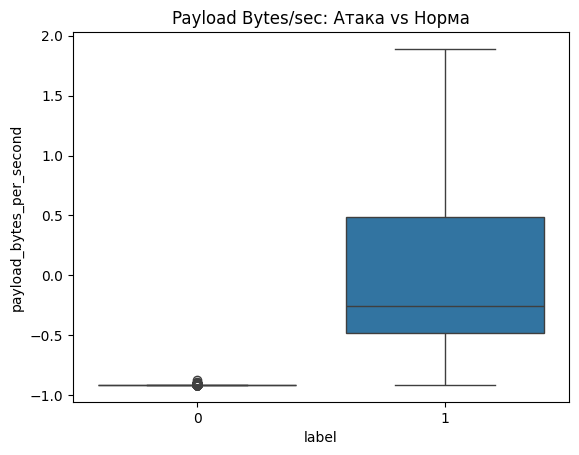

In [ ]:
sns.boxplot(x="label", y="payload_bytes_per_second", data=df)
plt.title("Payload Bytes/sec: Атака vs Норма")
plt.show()

Нормальний трафік (label = 0) має стійко низьке навантаження, майже не змінюється.

Атакуючий трафік (label = 1) демонструє широкий розкид — у частини атак спостерігається значне перевантаження каналу.

це характерно для DDoS, UDP-флуду, або надмірного публікування в MQTT.

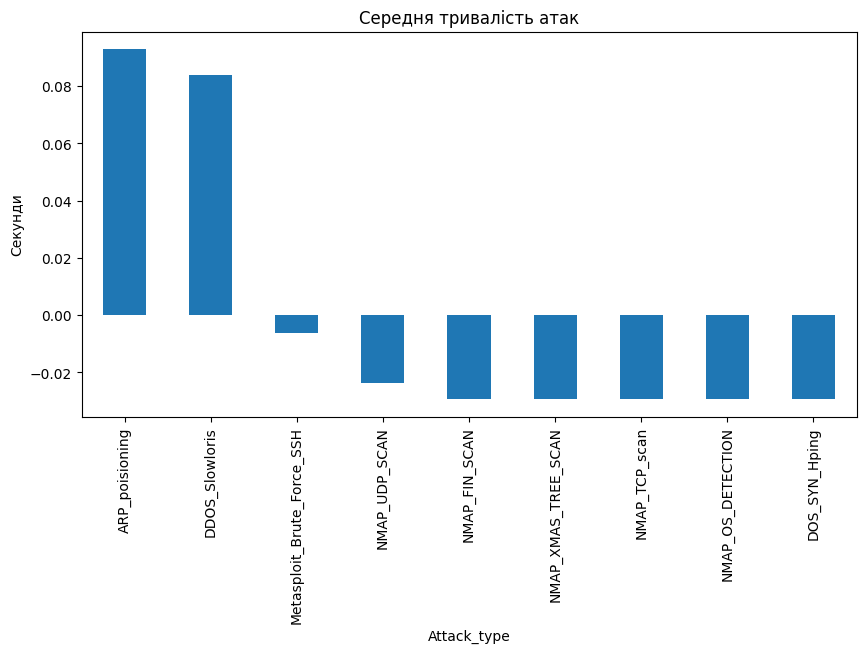

In [ ]:
attack_duration = df[df["label"] == 1].groupby("Attack_type")["flow_duration"].mean().sort_values(ascending=False)
attack_duration.plot(kind="bar", figsize=(10, 5), title="Середня тривалість атак")
plt.ylabel("Секунди")
plt.show()

Середня тривалість атак по типах: Найбільш “стабільні” атаки — ARP_poisoning, DDOS_Slowloris — мають найдовшу сесію.

Більшість інших атак — дуже короткі за тривалістю, фактично миттєві (scan/fuzzing/DoS)

атаки типу Slowloris і ARP виснажують ресурси поступово, тримаючи сесію відкритою, у той час як NMAP і Hping — працюють імпульсно.

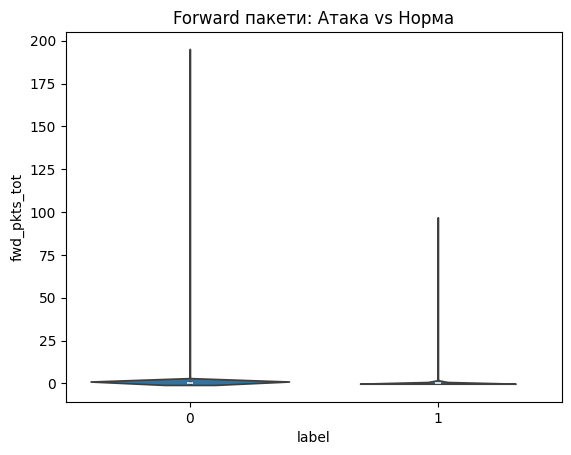

In [ ]:
sns.violinplot(x="label", y="fwd_pkts_tot", data=df)
plt.title("Forward пакети: Атака vs Норма")
plt.show()

У нормальному трафіку трапляються пікові значення до 200 forward-пакетів — наприклад, при публікації великої кількості IoT-даних.

У атаках forward-пакетів загалом менше, але частіше трапляються сплески до середніх значень (5–30).

Підозрілі активності часто запускають короткі bursts, тоді як нормальний трафік — або стабільний, або рідко — але з великим обсягом.